In [73]:
#
# hw4pr2:  digit clasification via nearest neighbors
#

In [74]:
#
# UPDATED for births...
#


#
# We don't need any data at all to create a predictive model!  190942 median births
#
import random

def predictive_model( Features ):
    """ input: a list of two features 
                [ month, day ]
        output: the predicted number of births, either
                 below median (0)  or above median (1)
    """
    [ month, day ] = Features # unpacking!
    if 6 <= month <= 9:
        return 'above median (1)'
    else:
        return 'below median (0)'
    
#
# Try it!
# 
# Features = eval(input("Enter new Features: "))
#
Features = [ 9, 6 ] # september 6       # only TWO features here!
result = predictive_model( Features )
print(f"I predict {result} from Features {Features}")

I predict above median (1) from Features [9, 6]


In [75]:
#
# (now, to explore how we _can_ use data to do better... :-) 
#

In [76]:
# libraries!
import numpy as np      # numpy is Python's "array" library
import pandas as pd     # Pandas is Python's "data" library ("dataframe" == spreadsheet)
import seaborn as sns   # yay for Seaborn!

In [77]:
#
# Notice that almost all of these cells are still for flowers!
#

#
# Your task is to adapt them to build a births-frequency model (above/below median)
#

In [78]:
# let's read in our digits data...
# 
# for read_csv, use header=0 when row 0 is a header row
# 
filename = 'digits.csv'
df = pd.read_csv(filename, header=0)   # read the file w/header row #0
print(f"{filename} : file read into a pandas dataframe.")

digits.csv : file read into a pandas dataframe.


<AxesSubplot:xlabel='year', ylabel='month'>

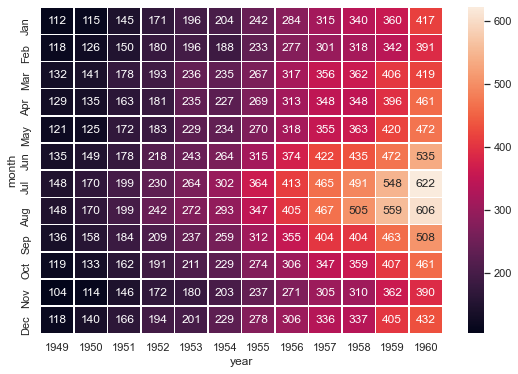

In [79]:
#
# but, let's at least see a few digits first!
#
#
# first, does the heatmap work...
#

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()  # sns.set_theme()

# Load the example flights dataset and convert to long-form
flights_long = sns.load_dataset("flights")
flights = flights_long.pivot("month", "year", "passengers")

# Draw a heatmap with the numeric values in each cell
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(flights, annot=True, fmt="d", linewidths=.5, ax=ax)

The numeral is 6

The pixels are
[[ 0  0  0 10 11  0  0  0]
 [ 0  0  9 16  6  0  0  0]
 [ 0  0 15 13  0  0  0  0]
 [ 0  0 14 10  0  0  0  0]
 [ 0  1 15 12  8  2  0  0]
 [ 0  0 12 16 16 16 10  1]
 [ 0  0  7 16 12 12 16  4]
 [ 0  0  0  9 15 12  5  0]]


<AxesSubplot:>

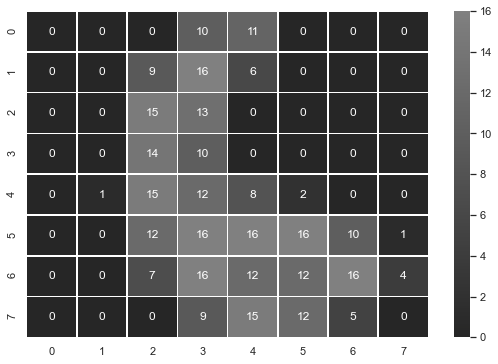

In [80]:
#
# Let's grab one row and shape it to be 8x8 (which is shape (8,8))
#
row_to_show = 42    # remember this will be different in the spreadsheet

numeral = int(round(df.iloc[row_to_show,64]))
print(f"The numeral is {numeral}\n")

pixels = df.iloc[row_to_show,0:64]  # dont want the rightmost rows
pixels = pixels.values              # converts to numpy array
pixels = pixels.astype(int)             # conver to integers for plotting
pixels = np.reshape(pixels, (8,8))  # makes 8x8
print(f"The pixels are\n{pixels}")  

# Draw a heatmap with the numeric values in each cell
f, ax = plt.subplots(figsize=(9, 6))
my_cmap = sns.dark_palette("Gray", as_cmap=True)
#my_cmap = sns.light_palette("Gray", as_cmap=True)    # all seaborn palettes: medium.com/@morganjonesartist/color-guide-to-seaborn-palettes-da849406d44f

# plot! Change True to False to skip the numbers...  None for reddish palette
sns.heatmap(pixels, annot=True, fmt="d", linewidths=.5, ax=ax, cmap=my_cmap)

In [81]:
#
# a dataframe is a "spreadsheet in Python"   (seems to have an extra column!)
#
pd.set_option('display.max_rows', 10)  # None for no limit; default: 10
pd.set_option('display.min_rows', 10)  # None for no limit; default: 10
# let's view it!
df

,pix0,pix1,pix2,pix3,pix4,pix5,pix6,pix7,pix8,pix9,...,pix56,pix57,pix58,pix59,pix60,pix61,pix62,pix63,actual_digit,excerpted from http://yann.lecun.com/exdb/mnist/
0,0,0,9,14,8,1,0,0,0,0,...,0,0,11,16,15,11,1,0,8,NaN
1,0,0,11,12,0,0,0,0,0,2,...,0,0,9,12,13,3,0,0,9,NaN
2,0,0,1,9,15,11,0,0,0,0,...,0,0,1,10,13,3,0,0,0,NaN
3,0,0,0,0,14,13,1,0,0,0,...,0,0,0,1,13,16,1,0,1,NaN
4,0,0,5,12,1,0,0,0,0,0,...,0,0,3,11,8,13,12,4,2,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1763,0,0,4,10,13,6,0,0,0,1,...,0,0,2,14,15,9,0,0,9,NaN
1764,0,0,6,16,13,11,1,0,0,0,...,0,0,6,16,14,6,0,0,0,NaN
1765,0,0,1,11,15,1,0,0,0,0,...,0,0,2,9,13,6,0,0,8,NaN
1766,0,0,2,10,7,0,0,0,0,0,...,0,0,5,12,16,12,0,0,9,NaN


In [82]:
#
# let's look at our pandas dataframe   (Aargh: that extra column!)
#
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1768 entries, 0 to 1767
Data columns (total 66 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   pix0                                              1768 non-null   int64  
 1   pix1                                              1768 non-null   int64  
 2   pix2                                              1768 non-null   int64  
 3   pix3                                              1768 non-null   int64  
 4   pix4                                              1768 non-null   int64  
 5   pix5                                              1768 non-null   int64  
 6   pix6                                              1768 non-null   int64  
 7   pix7                                              1768 non-null   int64  
 8   pix8                                              1768 non-null   int64  
 9   pix9               

In [83]:
#
# let's drop that last column (dropping is usually by _name_):
#
#   if you want a list of the column names use df.columns
col65name = df.columns[65]  # get column name at index 65
df_clean = df.drop(columns=[col65name])  # drop by name is typical
df_clean.info()                         # should be happier!

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1768 entries, 0 to 1767
Data columns (total 65 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   pix0          1768 non-null   int64
 1   pix1          1768 non-null   int64
 2   pix2          1768 non-null   int64
 3   pix3          1768 non-null   int64
 4   pix4          1768 non-null   int64
 5   pix5          1768 non-null   int64
 6   pix6          1768 non-null   int64
 7   pix7          1768 non-null   int64
 8   pix8          1768 non-null   int64
 9   pix9          1768 non-null   int64
 10  pix10         1768 non-null   int64
 11  pix11         1768 non-null   int64
 12  pix12         1768 non-null   int64
 13  pix13         1768 non-null   int64
 14  pix14         1768 non-null   int64
 15  pix15         1768 non-null   int64
 16  pix16         1768 non-null   int64
 17  pix17         1768 non-null   int64
 18  pix18         1768 non-null   int64
 19  pix19         1768 non-null

In [84]:
#
# let's keep our column names in variables, for reference
#
COLUMNS = df_clean.columns            # "list" of columns
print(f"COLUMNS is {COLUMNS}\n")  
  # It's a "pandas" list, called an Index
  # use it just as a Python list of strings:
print(f"COLUMNS[0] is {COLUMNS[0]}\n")

# let's create a dictionary to look up any column index by name
COL_INDEX = {}
for i, name in enumerate(COLUMNS):
    COL_INDEX[name] = i  # using the name (as key), look up the value (i)
print(f"COL_INDEX is {COL_INDEX}")

COLUMNS is Index(['pix0', 'pix1', 'pix2', 'pix3', 'pix4', 'pix5', 'pix6', 'pix7', 'pix8',
       'pix9', 'pix10', 'pix11', 'pix12', 'pix13', 'pix14', 'pix15', 'pix16',
       'pix17', 'pix18', 'pix19', 'pix20', 'pix21', 'pix22', 'pix23', 'pix24',
       'pix25', 'pix26', 'pix27', 'pix28', 'pix29', 'pix30', 'pix31', 'pix32',
       'pix33', 'pix34', 'pix35', 'pix36', 'pix37', 'pix38', 'pix39', 'pix40',
       'pix41', 'pix42', 'pix43', 'pix44', 'pix45', 'pix46', 'pix47', 'pix48',
       'pix49', 'pix50', 'pix51', 'pix52', 'pix53', 'pix54', 'pix55', 'pix56',
       'pix57', 'pix58', 'pix59', 'pix60', 'pix61', 'pix62', 'pix63',
       'actual_digit'],
      dtype='object')

COLUMNS[0] is pix0

COL_INDEX is {'pix0': 0, 'pix1': 1, 'pix2': 2, 'pix3': 3, 'pix4': 4, 'pix5': 5, 'pix6': 6, 'pix7': 7, 'pix8': 8, 'pix9': 9, 'pix10': 10, 'pix11': 11, 'pix12': 12, 'pix13': 13, 'pix14': 14, 'pix15': 15, 'pix16': 16, 'pix17': 17, 'pix18': 18, 'pix19': 19, 'pix20': 20, 'pix21': 21, 'pix22': 22, 'pix23'

In [85]:
#
# let's look at our cleaned-up dataframe...
#
df_clean.info()   
#
# notice that the non-null is _different_ for irisname!
df_clean   # show a table! (the problem rows are the last two...)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1768 entries, 0 to 1767
Data columns (total 65 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   pix0          1768 non-null   int64
 1   pix1          1768 non-null   int64
 2   pix2          1768 non-null   int64
 3   pix3          1768 non-null   int64
 4   pix4          1768 non-null   int64
 5   pix5          1768 non-null   int64
 6   pix6          1768 non-null   int64
 7   pix7          1768 non-null   int64
 8   pix8          1768 non-null   int64
 9   pix9          1768 non-null   int64
 10  pix10         1768 non-null   int64
 11  pix11         1768 non-null   int64
 12  pix12         1768 non-null   int64
 13  pix13         1768 non-null   int64
 14  pix14         1768 non-null   int64
 15  pix15         1768 non-null   int64
 16  pix16         1768 non-null   int64
 17  pix17         1768 non-null   int64
 18  pix18         1768 non-null   int64
 19  pix19         1768 non-null

,pix0,pix1,pix2,pix3,pix4,pix5,pix6,pix7,pix8,pix9,...,pix55,pix56,pix57,pix58,pix59,pix60,pix61,pix62,pix63,actual_digit
0,0,0,9,14,8,1,0,0,0,0,...,0,0,0,11,16,15,11,1,0,8
1,0,0,11,12,0,0,0,0,0,2,...,0,0,0,9,12,13,3,0,0,9
2,0,0,1,9,15,11,0,0,0,0,...,0,0,0,1,10,13,3,0,0,0
3,0,0,0,0,14,13,1,0,0,0,...,0,0,0,0,1,13,16,1,0,1
4,0,0,5,12,1,0,0,0,0,0,...,2,0,0,3,11,8,13,12,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1763,0,0,4,10,13,6,0,0,0,1,...,0,0,0,2,14,15,9,0,0,9
1764,0,0,6,16,13,11,1,0,0,0,...,0,0,0,6,16,14,6,0,0,0
1765,0,0,1,11,15,1,0,0,0,0,...,0,0,0,2,9,13,6,0,0,8
1766,0,0,2,10,7,0,0,0,0,0,...,0,0,0,5,12,16,12,0,0,9


In [86]:
#
# typically, after dropping columns we don't want, 
#   we drop rows with missing data (other approaches are possible, too)
#
df_full = df_clean.dropna()   # this removes all rows with nan items
df_full.info()                # it's "full" because it has no nan items
df_full
#
# notice that _all_ of the rows now have 142 non-null items
#    also, the last row isn't real data... we'll handle it next

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1768 entries, 0 to 1767
Data columns (total 65 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   pix0          1768 non-null   int64
 1   pix1          1768 non-null   int64
 2   pix2          1768 non-null   int64
 3   pix3          1768 non-null   int64
 4   pix4          1768 non-null   int64
 5   pix5          1768 non-null   int64
 6   pix6          1768 non-null   int64
 7   pix7          1768 non-null   int64
 8   pix8          1768 non-null   int64
 9   pix9          1768 non-null   int64
 10  pix10         1768 non-null   int64
 11  pix11         1768 non-null   int64
 12  pix12         1768 non-null   int64
 13  pix13         1768 non-null   int64
 14  pix14         1768 non-null   int64
 15  pix15         1768 non-null   int64
 16  pix16         1768 non-null   int64
 17  pix17         1768 non-null   int64
 18  pix18         1768 non-null   int64
 19  pix19         1768 non-null

,pix0,pix1,pix2,pix3,pix4,pix5,pix6,pix7,pix8,pix9,...,pix55,pix56,pix57,pix58,pix59,pix60,pix61,pix62,pix63,actual_digit
0,0,0,9,14,8,1,0,0,0,0,...,0,0,0,11,16,15,11,1,0,8
1,0,0,11,12,0,0,0,0,0,2,...,0,0,0,9,12,13,3,0,0,9
2,0,0,1,9,15,11,0,0,0,0,...,0,0,0,1,10,13,3,0,0,0
3,0,0,0,0,14,13,1,0,0,0,...,0,0,0,0,1,13,16,1,0,1
4,0,0,5,12,1,0,0,0,0,0,...,2,0,0,3,11,8,13,12,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1763,0,0,4,10,13,6,0,0,0,1,...,0,0,0,2,14,15,9,0,0,9
1764,0,0,6,16,13,11,1,0,0,0,...,0,0,0,6,16,14,6,0,0,0
1765,0,0,1,11,15,1,0,0,0,0,...,0,0,0,2,9,13,6,0,0,8
1766,0,0,2,10,7,0,0,0,0,0,...,0,0,0,5,12,16,12,0,0,9


In [87]:
#
# updated for the BIRTHS dataset
#    + need to check against the median, 190942 births
#

NUMBER = ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"]   # int to str
NUMBERS_INDEX = {'below median':0,'above median':1}  # str to int

def convert_species(NUMBER):
    """ return the species index (a unique integer/category) """  # 190942 births 
    #print(f"converting {speciesname}...")
    s = int(NUMBER)
    return s

# Let's try it out...
for number in range(10):
    print(f"{number} maps to {convert_species(number)}")

0 maps to 0
1 maps to 1
2 maps to 2
3 maps to 3
4 maps to 4
5 maps to 5
6 maps to 6
7 maps to 7
8 maps to 8
9 maps to 9


In [88]:
#
# we can "apply" to a whole column
#   it may give a warning, but this is ok...
#

# df_final['births'] = df_final['births'].apply(convert_species)

# Don't run this twice!   Why?!  What's "KeyError: 0"?
#   (for sure, you can always go back and re-establish definitions)

# don't worry about the (possible)  "SettingWithCopyWarning" here...

In [89]:
#
# let's see it!  (this is safe to run many times...)
#
df_full         # print(df_final.tostring())  # for _all_ rows...

,pix0,pix1,pix2,pix3,pix4,pix5,pix6,pix7,pix8,pix9,...,pix55,pix56,pix57,pix58,pix59,pix60,pix61,pix62,pix63,actual_digit
0,0,0,9,14,8,1,0,0,0,0,...,0,0,0,11,16,15,11,1,0,8
1,0,0,11,12,0,0,0,0,0,2,...,0,0,0,9,12,13,3,0,0,9
2,0,0,1,9,15,11,0,0,0,0,...,0,0,0,1,10,13,3,0,0,0
3,0,0,0,0,14,13,1,0,0,0,...,0,0,0,0,1,13,16,1,0,1
4,0,0,5,12,1,0,0,0,0,0,...,2,0,0,3,11,8,13,12,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1763,0,0,4,10,13,6,0,0,0,1,...,0,0,0,2,14,15,9,0,0,9
1764,0,0,6,16,13,11,1,0,0,0,...,0,0,0,6,16,14,6,0,0,0
1765,0,0,1,11,15,1,0,0,0,0,...,0,0,0,2,9,13,6,0,0,8
1766,0,0,2,10,7,0,0,0,0,0,...,0,0,0,5,12,16,12,0,0,9


In [90]:
#
# let's convert our dataframe to a numpy array, named A
#    Our ML library, scikit-learn operates entirely on numpy arrays.
#
A = df_full.values    # .values gets the numpy array
print(A)

[[ 0  0  9 ...  1  0  8]
 [ 0  0 11 ...  0  0  9]
 [ 0  0  1 ...  0  0  0]
 ...
 [ 0  0  1 ...  0  0  8]
 [ 0  0  2 ...  0  0  9]
 [ 0  0 10 ...  1  0  8]]


In [91]:
#
# let's make sure it's all floating-point, so we can multiply and divide
#
A = A.astype('float64')  # so many:  www.tutorialspoint.com/numpy/numpy_data_types.htm
print(A)

[[ 0.  0.  9. ...  1.  0.  8.]
 [ 0.  0. 11. ...  0.  0.  9.]
 [ 0.  0.  1. ...  0.  0.  0.]
 ...
 [ 0.  0.  1. ...  0.  0.  8.]
 [ 0.  0.  2. ...  0.  0.  9.]
 [ 0.  0. 10. ...  1.  0.  8.]]


In [92]:
#
# nice to have NUM_ROWS and NUM_COLS around
#
NUM_ROWS, NUM_COLS = A.shape
print(f"\nThe dataset has {NUM_ROWS} rows and {NUM_COLS} cols")


The dataset has 1768 rows and 65 cols


In [93]:
# let's use all of our variables, to reinforce names...

# choose a row index, n:
n = 5
print(f"row #{n} is {A[n]}")

for i in range(len(COLUMNS)):
    colname = COLUMNS[i]
    if colname != 'actual_digit':
        print(f"  Its {colname} is {A[n][i]}")
    else:
        species_num = int(A[n][i])
        species = NUMBER[species_num]
        print(f"  Its {colname} is {species} ({species_num})")

row #5 is [ 0.  2.  9. 15. 14.  9.  3.  0.  0.  4. 13.  8.  9. 16.  8.  0.  0.  0.
  0.  6. 14. 15.  3.  0.  0.  0.  0. 11. 14.  2.  0.  0.  0.  0.  0.  2.
 15. 11.  0.  0.  0.  0.  0.  0.  2. 15.  4.  0.  0.  1.  5.  6. 13. 16.
  6.  0.  0.  2. 12. 12. 13. 11.  0.  0.  3.]
  Its pix0 is 0.0
  Its pix1 is 2.0
  Its pix2 is 9.0
  Its pix3 is 15.0
  Its pix4 is 14.0
  Its pix5 is 9.0
  Its pix6 is 3.0
  Its pix7 is 0.0
  Its pix8 is 0.0
  Its pix9 is 4.0
  Its pix10 is 13.0
  Its pix11 is 8.0
  Its pix12 is 9.0
  Its pix13 is 16.0
  Its pix14 is 8.0
  Its pix15 is 0.0
  Its pix16 is 0.0
  Its pix17 is 0.0
  Its pix18 is 0.0
  Its pix19 is 6.0
  Its pix20 is 14.0
  Its pix21 is 15.0
  Its pix22 is 3.0
  Its pix23 is 0.0
  Its pix24 is 0.0
  Its pix25 is 0.0
  Its pix26 is 0.0
  Its pix27 is 11.0
  Its pix28 is 14.0
  Its pix29 is 2.0
  Its pix30 is 0.0
  Its pix31 is 0.0
  Its pix32 is 0.0
  Its pix33 is 0.0
  Its pix34 is 0.0
  Its pix35 is 2.0
  Its pix36 is 15.0
  Its pix37 is 11.0
  I

In [94]:
# we don't have to write our own ... because
#
#     we want knn for any k!
#     we want an already-debugged algorithm!
#     we want to ask iris q'ns instead of implementation ones... (?)
#

In [95]:
print("+++ Start of data definitions +++\n")

X_all = A[:,0:64]  # X (features) 
y_all = A[:,64]    # y (labels) 

print(f"X_all (just features) is \n {X_all}")
print(f"y_all (just labels)   is \n {y_all}")

+++ Start of data definitions +++

X_all (just features) is 
 [[ 0.  0.  9. ... 11.  1.  0.]
 [ 0.  0. 11. ...  3.  0.  0.]
 [ 0.  0.  1. ...  3.  0.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]
y_all (just labels)   is 
 [8. 9. 0. ... 8. 9. 8.]


In [96]:
# #
# # we can re-weight different features here...
# #

# COL_WEIGHT = {              # could be called Feature weight...
#     'month':1.0,
#     'day':1.0
# }

# for colname in COL_WEIGHT:
#     i = COL_INDEX[colname]    # get the column index, i, of the colname
#     weight = COL_WEIGHT[colname]  # from the dictionary above
#     print("Weighting", colname, "by", weight)   
#     # weighting == "multiplying"
#     X_all[:,i] *= weight   # multiply by the weight to give this column ("feature")

In [97]:
#
# we scramble the data, to give a different TRAIN/TEST split each time...
# 
indices = np.random.permutation(len(y_all))  # indices is a permutation-list

# we scramble both X and y, necessarily with the same permutation
X_labeled = X_all[indices]              # we apply the _same_ permutation to each!
y_labeled = y_all[indices]              # again...
print(X_labeled)
print(y_labeled)

[[ 0.  0.  3. ... 14.  6.  0.]
 [ 0.  0.  0. ...  7.  0.  0.]
 [ 0.  0. 10. ...  1.  0.  0.]
 ...
 [ 0.  0.  2. ... 16.  1.  0.]
 [ 0.  1.  8. ...  5.  0.  0.]
 [ 0.  0.  4. ...  2.  0.  0.]]
[9. 0. 5. ... 9. 5. 0.]


In [98]:
#
# We next separate into test data and training data ... 
#    + We will train on the training data...
#    + We will _not_ look at the testing data to build the model
#
# Then, afterward, we will test on the testing data -- and see how well we do!
#

#
# a common convention:  train on 80%, test on 20%    Let's define the TEST_PERCENT
#
NUM_ROWS = X_labeled.shape[0]     # the number of labeled rows
TEST_PERCENT = 0.20
TEST_SIZE = int(TEST_PERCENT*NUM_ROWS)   # no harm in rounding down

X_test = X_labeled[:TEST_SIZE]    # first section are for testing
y_test = y_labeled[:TEST_SIZE]

X_train = X_labeled[TEST_SIZE:]   # all the rest are for training
y_train = y_labeled[TEST_SIZE:]

print(f"training with {len(y_train)} rows;  testing with {len(y_test)} rows" )

training with 1415 rows;  testing with 353 rows


In [99]:
#
# +++ This is the "Model-building and Model-training Cell"
#       
# Create a kNN model and train it! 
#
from sklearn.neighbors import KNeighborsClassifier

k = 84   # we don't know what k to use, so we guess!  (this will _not_ be a good value)
knn_model = KNeighborsClassifier(n_neighbors=k)       # here, k is the "k" in kNN

# we train the model (it's one line!)
knn_model.fit(X_train, y_train)                              # yay!  trained!
print("Created and trained a knn classifier with k =", k)  

Created and trained a knn classifier with k = 84


In [100]:
#
# +++ This is the "Model-testing Cell"
#
# Now, let's see how well we did on our "held-out data" (the testing data)
#

# We run our test set!
predicted_labels = knn_model.predict(X_test)
actual_labels = y_test

# Let's print them so we can compare...
print("Predicted labels:", predicted_labels)
print("Actual  labels  :", actual_labels)

# And, some overall results
num_correct = sum(predicted_labels == actual_labels)
total = len(actual_labels)
print(f"\nResults on test set:  {num_correct} correct out of {total} total.")

Predicted labels: [9. 0. 5. 1. 2. 6. 4. 6. 6. 1. 0. 4. 5. 3. 2. 8. 5. 6. 4. 8. 9. 1. 7. 2.
 4. 1. 1. 6. 8. 4. 4. 2. 5. 7. 5. 7. 6. 1. 2. 0. 9. 3. 7. 0. 9. 4. 1. 3.
 0. 7. 4. 5. 7. 8. 1. 7. 7. 7. 7. 9. 6. 1. 6. 9. 7. 2. 2. 6. 0. 2. 6. 9.
 1. 8. 4. 9. 8. 8. 4. 9. 9. 5. 6. 0. 3. 8. 9. 8. 3. 0. 3. 9. 7. 3. 7. 2.
 2. 9. 9. 3. 4. 7. 6. 6. 0. 8. 7. 9. 3. 9. 7. 9. 1. 8. 0. 4. 3. 7. 4. 8.
 9. 8. 0. 5. 1. 8. 8. 2. 9. 2. 6. 5. 7. 1. 1. 3. 1. 6. 3. 9. 0. 6. 2. 9.
 7. 2. 8. 4. 5. 3. 6. 1. 0. 6. 6. 4. 7. 7. 3. 9. 2. 0. 4. 9. 0. 2. 9. 5.
 6. 5. 1. 0. 5. 3. 6. 7. 4. 3. 4. 8. 3. 7. 0. 9. 7. 5. 8. 6. 3. 4. 6. 0.
 1. 1. 8. 5. 1. 3. 6. 5. 2. 9. 2. 1. 5. 8. 1. 3. 9. 7. 9. 3. 8. 3. 2. 6.
 2. 1. 5. 6. 1. 4. 5. 2. 5. 3. 2. 4. 4. 7. 4. 5. 8. 3. 1. 9. 3. 9. 5. 4.
 9. 5. 6. 4. 3. 5. 5. 6. 0. 7. 4. 8. 6. 6. 6. 4. 7. 0. 0. 1. 1. 3. 3. 9.
 4. 7. 9. 7. 0. 5. 9. 5. 5. 7. 4. 1. 2. 5. 0. 9. 4. 2. 9. 8. 8. 0. 1. 5.
 8. 1. 0. 1. 8. 2. 2. 0. 2. 4. 0. 0. 2. 4. 6. 3. 7. 6. 7. 5. 1. 1. 3. 3.
 5. 0. 1. 3. 3. 3. 9. 3. 8. 2. 3.

In [101]:
#
# Let's print these more helpfully, in a vertical table
#

def compare_labels(predicted_labels, actual_labels):
    """ a more neatly formatted comparison """
    NUM_LABELS = len(predicted_labels)
    num_correct = 0
    
    for i in range(NUM_LABELS):
        p = int(round(predicted_labels[i]))         # round protects from fp error 
        a = int(round(actual_labels[i]))
        result = "incorrect"
        if p == a:  # if they match,
            result = ""       # no longer incorrect
            num_correct += 1  # and we count a match!

        print(f"row {i:>3d} : {NUMBER[p]:>12s} {NUMBER[a]:<12s}   {result}")   

    print()
    print("Correct:", num_correct, "out of", NUM_LABELS)
    return num_correct

In [102]:
#
# let's try it out!
#

compare_labels(predicted_labels,actual_labels)

row   0 :            9 9              
row   1 :            0 0              
row   2 :            5 5              
row   3 :            1 1              
row   4 :            2 2              
row   5 :            6 6              
row   6 :            4 4              
row   7 :            6 6              
row   8 :            6 6              
row   9 :            1 1              
row  10 :            0 0              
row  11 :            4 4              
row  12 :            5 5              
row  13 :            3 3              
row  14 :            2 2              
row  15 :            8 8              
row  16 :            5 5              
row  17 :            6 6              
row  18 :            4 4              
row  19 :            8 8              
row  20 :            9 9              
row  21 :            1 1              
row  22 :            7 7              
row  23 :            2 2              
row  24 :            4 4              
row  25 :            1 1 

319

In [103]:
#
# Ok!  We have our knn model, we could just use it...
#

#
# data-driven predictive model (k-nearest-neighbor), using scikit-learn
#

def predictive_model( Features ):
    """ input: a list of four features 
                [ sepallen, sepalwid, petallen, petalwid ]
        output: the predicted species of iris, from
                  setosa (0), versicolor (1), virginica (2)
    """
    our_features = np.asarray([Features])                 # extra brackets needed
    predicted_species = knn_model.predict(our_features)
    
    predicted_species = int(round(predicted_species[0]))  # unpack one element
    name = NUMBER[predicted_species]
    return f"{name} ({predicted_species})"
    
#
# Try it!
# 
# Features = eval(input("Enter new Features: "))
#
Features = [0,0,9,14,8,1,0,0,0,0,12,14,14,12,0,0,0,0,9,10,0,15,4,0,0,0,3,16,12,14,2,0,0,0,4,16,16,2,0,0,0,3,16,8,10,13,2,0,0,1,15,1,3,16,8,0,0,0,11,16,15,11,1,0]
result = predictive_model( Features )
print(f"I predict {result} from Features {Features}")

I predict 8 (8) from Features [0, 0, 9, 14, 8, 1, 0, 0, 0, 0, 12, 14, 14, 12, 0, 0, 0, 0, 9, 10, 0, 15, 4, 0, 0, 0, 3, 16, 12, 14, 2, 0, 0, 0, 4, 16, 16, 2, 0, 0, 0, 3, 16, 8, 10, 13, 2, 0, 0, 1, 15, 1, 3, 16, 8, 0, 0, 0, 11, 16, 15, 11, 1, 0]


In [104]:
#
# Except, we didn't really explore whether this was the BEST model we could build!
#
#
# We used k = 84  (a neighborhood size of 84 flowers)
# In a dataset of only 140ish flowers, with three species, this seems like a bad idea!
#
# Perhaps we should try ALL the neighborhood sizes in their own TRAIN/TEST split
# and see which neighborhood size works the best, for irises, at least...
#

In [105]:
#
# to do this, we use "cross validation"
#

from sklearn.model_selection import cross_val_score

#
# cross-validation splits the training set into two pieces:
#   + model-building and model-validation. We'll use "build" and "validate"
#
best_k = 0
best_accuracy = 0
for k in range(1, 80): # we hardcoded a number because it takes too long, but we noticed best_k = 1
    knn_cv_model = KNeighborsClassifier(n_neighbors=k)   # build knn_model for every k!
    cv_scores = cross_val_score( knn_cv_model, X_train, y_train, cv=5 )  # 5 means 80/20 split
    # print(cv_scores)  # just to see the five scores... 
    average_cv_accuracy = cv_scores.mean()  # mean() is numpy's built-in average function 
    if average_cv_accuracy > best_accuracy:
        best_k = k
        best_accuracy = average_cv_accuracy
    
    print(f"k: {k:2d}  cv accuracy: {average_cv_accuracy:7.4f}")
    
# assign best value of k to best_k
# you'll need to use the loop above to find and remember the real best_k

print(f"best_k = {best_k}   yields the highest average cv accuracy.")  # print the best one

k:  1  cv accuracy:  0.9859
k:  2  cv accuracy:  0.9845
k:  3  cv accuracy:  0.9837
k:  4  cv accuracy:  0.9816
k:  5  cv accuracy:  0.9823
k:  6  cv accuracy:  0.9837
k:  7  cv accuracy:  0.9809
k:  8  cv accuracy:  0.9823
k:  9  cv accuracy:  0.9802
k: 10  cv accuracy:  0.9809
k: 11  cv accuracy:  0.9795
k: 12  cv accuracy:  0.9795
k: 13  cv accuracy:  0.9774
k: 14  cv accuracy:  0.9746
k: 15  cv accuracy:  0.9746
k: 16  cv accuracy:  0.9731
k: 17  cv accuracy:  0.9717
k: 18  cv accuracy:  0.9710
k: 19  cv accuracy:  0.9703
k: 20  cv accuracy:  0.9703
k: 21  cv accuracy:  0.9675
k: 22  cv accuracy:  0.9675
k: 23  cv accuracy:  0.9640
k: 24  cv accuracy:  0.9640
k: 25  cv accuracy:  0.9647
k: 26  cv accuracy:  0.9625
k: 27  cv accuracy:  0.9583
k: 28  cv accuracy:  0.9604
k: 29  cv accuracy:  0.9597
k: 30  cv accuracy:  0.9590
k: 31  cv accuracy:  0.9555
k: 32  cv accuracy:  0.9541
k: 33  cv accuracy:  0.9541
k: 34  cv accuracy:  0.9527
k: 35  cv accuracy:  0.9519
k: 36  cv accuracy: 

In [106]:
#
# Now, we re-create and re-run the  "Model-building and -training Cell"
#
# Now, using best_k instead of the original, randomly-guessed value    How does it do?!
#
from sklearn.neighbors import KNeighborsClassifier
knn_model_tuned = KNeighborsClassifier(n_neighbors=best_k)   # here, we use the best_k

# we train the model (one line!)
knn_model_tuned.fit(X_train, y_train)                              # yay!  trained!
print(f"Created + trained a knn classifier, now tuned with a (best) k of {best_k}")  

Created + trained a knn classifier, now tuned with a (best) k of 1


In [107]:
#
# Re-create and re-run the  "Model-testing Cell"     How does it do with best_k?!
#
predicted_labels = knn_model_tuned.predict(X_test)
actual_labels = y_test

# Let's print them so we can compare...
print("Predicted labels:", predicted_labels)
print("Actual labels:", actual_labels)
print()
# and, we'll print our nicer table...
compare_labels(predicted_labels,actual_labels)

Predicted labels: [9. 0. 5. 1. 2. 6. 4. 6. 6. 1. 0. 4. 5. 3. 2. 8. 5. 6. 4. 8. 9. 1. 7. 2.
 4. 1. 1. 6. 8. 4. 4. 2. 5. 4. 5. 7. 6. 1. 2. 0. 9. 3. 7. 0. 9. 4. 1. 3.
 0. 7. 4. 5. 7. 8. 1. 7. 7. 7. 7. 9. 6. 1. 6. 3. 7. 2. 2. 6. 0. 2. 6. 9.
 1. 8. 4. 9. 8. 8. 4. 9. 1. 5. 6. 0. 3. 8. 9. 8. 3. 0. 3. 9. 7. 3. 7. 8.
 1. 9. 9. 3. 4. 8. 6. 6. 0. 8. 7. 9. 3. 9. 7. 9. 1. 8. 0. 4. 3. 7. 4. 8.
 9. 2. 0. 5. 1. 8. 8. 2. 9. 2. 6. 5. 7. 1. 1. 3. 8. 6. 3. 5. 0. 6. 2. 8.
 7. 2. 8. 4. 5. 3. 6. 1. 0. 6. 6. 4. 7. 7. 3. 9. 2. 0. 4. 9. 0. 2. 9. 5.
 6. 5. 1. 0. 5. 3. 1. 7. 4. 3. 4. 8. 3. 7. 0. 1. 9. 5. 8. 6. 3. 5. 8. 0.
 4. 1. 8. 5. 1. 1. 6. 5. 2. 9. 2. 1. 5. 8. 1. 3. 9. 7. 8. 3. 8. 3. 2. 6.
 2. 1. 5. 6. 1. 4. 5. 2. 5. 2. 2. 4. 4. 8. 4. 5. 8. 3. 1. 9. 3. 9. 5. 4.
 9. 5. 1. 4. 8. 5. 5. 6. 0. 7. 4. 8. 6. 6. 6. 4. 9. 0. 0. 1. 1. 3. 3. 9.
 4. 7. 8. 7. 0. 5. 9. 5. 5. 7. 4. 2. 1. 5. 0. 9. 4. 2. 1. 8. 8. 0. 1. 5.
 8. 1. 0. 1. 8. 1. 2. 0. 2. 9. 0. 0. 2. 4. 6. 3. 7. 6. 7. 5. 1. 1. 3. 3.
 5. 2. 1. 3. 3. 3. 9. 3. 8. 2. 8.

349

In [108]:
#
# Ok!  We have tuned knn to use the "best" value of k...
#
# And, we should really use ALL available data to train our final predictive model:
#

knn_model_final = KNeighborsClassifier(n_neighbors=best_k)   # here, we use the best_k
knn_model_final.fit(X_all, y_all)                              # yay!  trained!
print(f"Created + trained a 'final' knn classifier, with a (best) k of {best_k}") 

Created + trained a 'final' knn classifier, with a (best) k of 1


In [109]:
#
# final predictive model (k-nearest-neighbor), with tuned k + ALL data incorporated
#

def predictive_model( Features ):
    """ input: a list of four features 
                [ sepallen, sepalwid, petallen, petalwid ]
        output: the predicted species of iris, from
                  setosa (0), versicolor (1), virginica (2)
    """
    our_features = np.asarray([Features])                 # extra brackets needed
    predicted_species = knn_model_final.predict(our_features)
    
    predicted_species = int(round(predicted_species[0]))  # unpack one element
    name = NUMBER[predicted_species]
    return f"{name} ({predicted_species})"
    
#
# Try it!
# 
# Features = eval(input("Enter new Features: "))
#
Features = [0,0,9,14,8,1,0,0,0,0,12,14,14,12,0,0,0,0,9,10,0,15,4,0,0,0,3,16,12,14,2,0,0,0,4,16,16,2,0,0,0,3,16,8,10,13,2,0,0,1,15,1,3,16,8,0,0,0,11,16,15,11,1,0]  # [10,4.2]
result = predictive_model( Features )
print(f"I predict {result} from Features {Features}")

I predict 8 (8) from Features [0, 0, 9, 14, 8, 1, 0, 0, 0, 0, 12, 14, 14, 12, 0, 0, 0, 0, 9, 10, 0, 15, 4, 0, 0, 0, 3, 16, 12, 14, 2, 0, 0, 0, 4, 16, 16, 2, 0, 0, 0, 3, 16, 8, 10, 13, 2, 0, 0, 1, 15, 1, 3, 16, 8, 0, 0, 0, 11, 16, 15, 11, 1, 0]


In [110]:
LoD = [[0,0,9,14,8,1,0,0,0,0,12,14,14,12,0,0,0,0,9,10,0,15,4,0,0,0,3,16,12,14,2,0,0,0,4,16,16,2,0,0,0,3,16,8,10,13,2,0,0,1,15,1,3,16,8,0,0,0,11,16,15,11,1,0],
[0,0,11,12,0,0,0,0,0,2,16,16,16,13,0,0,0,3,16,12,10,14,0,0,0,1,16,1,12,15,0,0,0,0,13,16,9,15,2,0,0,0,0,3,0,9,11,0,0,0,0,0,9,15,4,0,0,0,9,12,13,3,0,0],
[0,0,1,9,15,11,0,0,0,0,11,16,8,14,6,0,0,2,16,10,0,9,9,0,0,1,16,4,0,8,8,0,0,4,16,4,0,8,8,0,0,1,16,5,1,11,3,0,0,0,12,12,10,10,0,0,0,0,1,10,13,3,0,0],
]

for x in LoD:
    result = predictive_model(x)
    print(f"I predict {result} from Features {x}")

#
# try it on new data!  (grab it from the problem statement)
#
#
# TO DO for hw4pr1:
#       write a loop that will handle _multiple_ new flowers and predict their species...
#

I predict 8 (8) from Features [0, 0, 9, 14, 8, 1, 0, 0, 0, 0, 12, 14, 14, 12, 0, 0, 0, 0, 9, 10, 0, 15, 4, 0, 0, 0, 3, 16, 12, 14, 2, 0, 0, 0, 4, 16, 16, 2, 0, 0, 0, 3, 16, 8, 10, 13, 2, 0, 0, 1, 15, 1, 3, 16, 8, 0, 0, 0, 11, 16, 15, 11, 1, 0]
I predict 9 (9) from Features [0, 0, 11, 12, 0, 0, 0, 0, 0, 2, 16, 16, 16, 13, 0, 0, 0, 3, 16, 12, 10, 14, 0, 0, 0, 1, 16, 1, 12, 15, 0, 0, 0, 0, 13, 16, 9, 15, 2, 0, 0, 0, 0, 3, 0, 9, 11, 0, 0, 0, 0, 0, 9, 15, 4, 0, 0, 0, 9, 12, 13, 3, 0, 0]
I predict 0 (0) from Features [0, 0, 1, 9, 15, 11, 0, 0, 0, 0, 11, 16, 8, 14, 6, 0, 0, 2, 16, 10, 0, 9, 9, 0, 0, 1, 16, 4, 0, 8, 8, 0, 0, 4, 16, 4, 0, 8, 8, 0, 0, 1, 16, 5, 1, 11, 3, 0, 0, 0, 12, 12, 10, 10, 0, 0, 0, 0, 1, 10, 13, 3, 0, 0]


In [111]:
#
# Be sure your results from trying this on the unknown data are here - or above!
#

In [112]:
#
# That's it!  Welcome to the world of model-building workflows!!    
#
#             Our prediction?  We'll be back for more ML! 
#

#
# In fact, the rest of the hw is to run more ML workflows:   Digits, Titanic, Housing, ...
#

In [189]:
def direction(newA):

    X_all = newA[:,0:len(newA[0])-1]  # X (features) 
    y_all = newA[:,len(newA[0])-1]    # y (labels) 

    #
    # we scramble the data, to give a different TRAIN/TEST split each time...
    # 
    indices = np.random.permutation(len(y_all))  # indices is a permutation-list

    # we scramble both X and y, necessarily with the same permutation
    X_labeled = X_all[indices]              # we apply the _same_ permutation to each!
    y_labeled = y_all[indices]              # again...
    print(X_labeled)
    print(y_labeled)

    #
    # We next separate into test data and training data ... 
    #    + We will train on the training data...
    #    + We will _not_ look at the testing data to build the model
    #
    # Then, afterward, we will test on the testing data -- and see how well we do!
    #

    #
    # a common convention:  train on 80%, test on 20%    Let's define the TEST_PERCENT
    #
    NUM_ROWS = X_labeled.shape[0]     # the number of labeled rows
    TEST_PERCENT = 0.20
    TEST_SIZE = int(TEST_PERCENT*NUM_ROWS)   # no harm in rounding down

    X_test = X_labeled[:TEST_SIZE]    # first section are for testing
    y_test = y_labeled[:TEST_SIZE]

    X_train = X_labeled[TEST_SIZE:]   # all the rest are for training
    y_train = y_labeled[TEST_SIZE:]

    print(f"training with {len(y_train)} rows;  testing with {len(y_test)} rows" )

    #
    # +++ This is the "Model-building and Model-training Cell"
    #       
    # Create a kNN model and train it! 
    #
    from sklearn.neighbors import KNeighborsClassifier

    k = 84   # we don't know what k to use, so we guess!  (this will _not_ be a good value)
    knn_model = KNeighborsClassifier(n_neighbors=k)       # here, k is the "k" in kNN

    # we train the model (it's one line!)
    knn_model.fit(X_train, y_train)                              # yay!  trained!
    print("Created and trained a knn classifier with k =", k)  

    #
    # +++ This is the "Model-testing Cell"
    #
    # Now, let's see how well we did on our "held-out data" (the testing data)
    #

    # We run our test set!
    predicted_labels = knn_model.predict(X_test)
    actual_labels = y_test

    # Let's print them so we can compare...
    print("Predicted labels:", predicted_labels)
    print("Actual  labels  :", actual_labels)

    # And, some overall results
    num_correct = sum(predicted_labels == actual_labels)
    total = len(actual_labels)
    print(f"\nResults on test set:  {num_correct} correct out of {total} total.")

    #
    # Let's print these more helpfully, in a vertical table
    #

    compare_labels(predicted_labels,actual_labels)

    #
    # Ok!  We have our knn model, we could just use it...
    #

    #
    # data-driven predictive model (k-nearest-neighbor), using scikit-learn
    #

    #
    # to do this, we use "cross validation"
    #

    from sklearn.model_selection import cross_val_score

    #
    # cross-validation splits the training set into two pieces:
    #   + model-building and model-validation. We'll use "build" and "validate"
    #
    best_k = 0
    best_accuracy = 0
    for k in range(1, 80): # we hardcoded a number because it takes too long, but we noticed best_k = 1
        knn_cv_model = KNeighborsClassifier(n_neighbors=k)   # build knn_model for every k!
        cv_scores = cross_val_score( knn_cv_model, X_train, y_train, cv=5 )  # 5 means 80/20 split
        # print(cv_scores)  # just to see the five scores... 
        average_cv_accuracy = cv_scores.mean()  # mean() is numpy's built-in average function 
        if average_cv_accuracy > best_accuracy:
            best_k = k
            best_accuracy = average_cv_accuracy

        print(f"k: {k:2d}  cv accuracy: {average_cv_accuracy:7.4f}")

    # assign best value of k to best_k
    # you'll need to use the loop above to find and remember the real best_k

    print(f"best_k = {best_k}   yields the highest average cv accuracy.")  # print the best one

    #
    # Now, we re-create and re-run the  "Model-building and -training Cell"
    #
    # Now, using best_k instead of the original, randomly-guessed value    How does it do?!
    #
    from sklearn.neighbors import KNeighborsClassifier
    knn_model_tuned = KNeighborsClassifier(n_neighbors=best_k)   # here, we use the best_k

    # we train the model (one line!)
    knn_model_tuned.fit(X_train, y_train)                              # yay!  trained!
    print(f"Created + trained a knn classifier, now tuned with a (best) k of {best_k}")  

    #
    # Re-create and re-run the  "Model-testing Cell"     How does it do with best_k?!
    #
    predicted_labels = knn_model_tuned.predict(X_test)
    actual_labels = y_test

    # Let's print them so we can compare...
    print("Predicted labels:", predicted_labels)
    print("Actual labels:", actual_labels)
    print()
    # and, we'll print our nicer table...
    compare_labels(predicted_labels,actual_labels)

    #
    # Ok!  We have tuned knn to use the "best" value of k...
    #
    # And, we should really use ALL available data to train our final predictive model:
    #

    knn_model_final = KNeighborsClassifier(n_neighbors=best_k)   # here, we use the best_k
    knn_model_final.fit(X_all, y_all)                              # yay!  trained!
    print(f"Created + trained a 'final' knn classifier, with a (best) k of {best_k}") 

    Features = [0,0,9,14,8,1,0,0,0,0,12,14,14,12,0,0,0,0,9,10,0,15,4,0,0,0,3,16,12,14,2,0,0,0,4,16,16,2,0,0,0,3,16,8,10,13,2,0,0,1,15,1,3,16,8,0,0,0,11,16,15,11,1,0]  # [10,4.2]
    result = predictive_model( Features )
    print(f"I predict {result} from Features {Features}")



In [192]:
def east(row):
    eastList = []
    for x in range(0, 65):
        if x%8 >= 4 or x == 64:
            eastList.append(row[x])
    return eastList

In [193]:
def west(row):
    westList = []
    for x in range(0, 65):
        if x%8 < 4 or x == 64:
            westList.append(row[x])
    return westList

In [194]:
# North = A[:,0:32] + A[:,64]
North = np.append(A[:,0:32], A[:,64:65], 1)
South = A[:,32:65]
East = np.apply_along_axis(east, 1, A)
West = np.apply_along_axis(west, 1, A)

In [201]:
print(North)

[[ 0.  0.  9. ...  2.  0.  8.]
 [ 0.  0. 11. ...  0.  0.  9.]
 [ 0.  0.  1. ...  8.  0.  0.]
 ...
 [ 0.  0.  1. ...  0.  0.  8.]
 [ 0.  0.  2. ...  4.  0.  9.]
 [ 0.  0. 10. ...  0.  0.  8.]]


In [202]:
print(South)

[[ 0.  0.  4. ...  1.  0.  8.]
 [ 0.  0. 13. ...  0.  0.  9.]
 [ 0.  4. 16. ...  0.  0.  0.]
 ...
 [ 0.  0.  9. ...  0.  0.  8.]
 [ 0.  0.  5. ...  0.  0.  9.]
 [ 0.  0. 12. ...  1.  0.  8.]]


In [203]:
print(East)

[[ 8.  1.  0. ...  1.  0.  8.]
 [ 0.  0.  0. ...  0.  0.  9.]
 [15. 11.  0. ...  0.  0.  0.]
 ...
 [15.  1.  0. ...  0.  0.  8.]
 [ 7.  0.  0. ...  0.  0.  9.]
 [ 8.  1.  0. ...  1.  0.  8.]]


In [204]:
print(West)

[[ 0.  0.  9. ... 11. 16.  8.]
 [ 0.  0. 11. ...  9. 12.  9.]
 [ 0.  0.  1. ...  1. 10.  0.]
 ...
 [ 0.  0.  1. ...  2.  9.  8.]
 [ 0.  0.  2. ...  5. 12.  9.]
 [ 0.  0. 10. ...  8. 12.  8.]]


In [206]:
direction(North)

[[ 0.  0.  3. ... 16.  1.  0.]
 [ 0.  0.  5. ... 16.  1.  0.]
 [ 0.  1. 12. ...  1.  0.  0.]
 ...
 [ 0.  0.  7. ... 12.  8.  0.]
 [ 0.  0.  9. ... 14.  1.  0.]
 [ 0.  0.  1. ...  4.  0.  0.]]
[8. 7. 5. ... 0. 2. 8.]
training with 1415 rows;  testing with 353 rows
Created and trained a knn classifier with k = 84
Predicted labels: [9. 7. 5. 0. 0. 0. 8. 2. 3. 7. 4. 2. 2. 9. 6. 7. 7. 2. 6. 0. 6. 0. 3. 4.
 8. 9. 3. 6. 7. 3. 2. 9. 0. 3. 7. 3. 9. 4. 3. 8. 5. 7. 9. 4. 1. 9. 6. 9.
 7. 8. 0. 0. 5. 1. 1. 8. 3. 9. 0. 1. 8. 4. 4. 9. 1. 7. 3. 3. 1. 2. 0. 5.
 3. 1. 5. 3. 1. 1. 7. 3. 1. 1. 2. 2. 9. 6. 9. 8. 2. 7. 1. 1. 9. 6. 1. 6.
 9. 1. 3. 0. 2. 0. 5. 0. 1. 9. 5. 4. 1. 7. 2. 8. 9. 2. 6. 0. 7. 6. 9. 2.
 7. 4. 0. 7. 4. 6. 3. 5. 7. 5. 7. 7. 5. 5. 3. 3. 3. 9. 9. 1. 8. 0. 5. 3.
 9. 6. 1. 1. 6. 8. 8. 9. 3. 5. 1. 3. 7. 5. 9. 6. 6. 7. 9. 0. 8. 6. 0. 3.
 1. 3. 6. 3. 5. 9. 1. 4. 4. 5. 4. 3. 4. 3. 4. 1. 5. 6. 1. 3. 1. 8. 1. 4.
 3. 4. 5. 2. 7. 2. 0. 0. 3. 4. 8. 4. 6. 0. 9. 1. 1. 0. 6. 4. 0. 1. 1. 3.
 8. 5. 4. 7.

k:  2  cv accuracy:  0.8594
k:  3  cv accuracy:  0.8841
k:  4  cv accuracy:  0.8770
k:  5  cv accuracy:  0.8799
k:  6  cv accuracy:  0.8834
k:  7  cv accuracy:  0.8749
k:  8  cv accuracy:  0.8813
k:  9  cv accuracy:  0.8841
k: 10  cv accuracy:  0.8876
k: 11  cv accuracy:  0.8806
k: 12  cv accuracy:  0.8784
k: 13  cv accuracy:  0.8756
k: 14  cv accuracy:  0.8700
k: 15  cv accuracy:  0.8714
k: 16  cv accuracy:  0.8664
k: 17  cv accuracy:  0.8622
k: 18  cv accuracy:  0.8615
k: 19  cv accuracy:  0.8636
k: 20  cv accuracy:  0.8615
k: 21  cv accuracy:  0.8594
k: 22  cv accuracy:  0.8544
k: 23  cv accuracy:  0.8516
k: 24  cv accuracy:  0.8523
k: 25  cv accuracy:  0.8466
k: 26  cv accuracy:  0.8445
k: 27  cv accuracy:  0.8445
k: 28  cv accuracy:  0.8473
k: 29  cv accuracy:  0.8417
k: 30  cv accuracy:  0.8424
k: 31  cv accuracy:  0.8375
k: 32  cv accuracy:  0.8332
k: 33  cv accuracy:  0.8318
k: 34  cv accuracy:  0.8283
k: 35  cv accuracy:  0.8283
k: 36  cv accuracy:  0.8269
k: 37  cv accuracy: 

In [208]:
direction(South)

[[ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  4. ... 15.  2.  0.]
 [ 0.  0.  0. ...  5.  0.  0.]
 ...
 [ 0.  0.  0. ...  0.  0.  0.]
 [ 0.  0.  0. ... 15.  4.  0.]
 [ 0. 10. 16. ...  8.  0.  0.]]
[3. 5. 3. ... 1. 9. 5.]
training with 1415 rows;  testing with 353 rows
Created and trained a knn classifier with k = 84
Predicted labels: [3. 9. 3. 3. 4. 0. 6. 1. 0. 3. 0. 7. 5. 2. 0. 5. 6. 2. 3. 7. 6. 4. 7. 9.
 1. 3. 6. 4. 1. 0. 2. 2. 6. 4. 8. 9. 4. 9. 2. 1. 6. 9. 7. 7. 2. 8. 2. 8.
 3. 5. 2. 3. 3. 3. 0. 7. 8. 3. 6. 7. 1. 5. 5. 4. 7. 5. 3. 4. 7. 1. 3. 9.
 6. 5. 4. 8. 7. 4. 1. 1. 6. 5. 7. 1. 7. 8. 4. 3. 9. 6. 3. 9. 2. 7. 1. 2.
 6. 3. 3. 8. 4. 5. 7. 6. 5. 0. 5. 9. 0. 0. 8. 1. 4. 4. 6. 5. 2. 4. 6. 6.
 4. 2. 2. 8. 6. 2. 9. 1. 5. 7. 0. 7. 5. 2. 7. 6. 4. 8. 5. 2. 3. 6. 3. 2.
 6. 1. 2. 6. 3. 0. 2. 2. 0. 1. 3. 1. 7. 9. 0. 1. 3. 1. 3. 0. 8. 7. 0. 2.
 4. 8. 7. 0. 3. 9. 2. 9. 7. 6. 4. 6. 4. 6. 4. 7. 2. 4. 1. 4. 6. 1. 3. 1.
 7. 9. 1. 4. 1. 1. 1. 6. 7. 8. 6. 1. 7. 0. 8. 3. 6. 7. 2. 2. 7. 0. 3. 9.
 4. 4. 6. 9.

k:  1  cv accuracy:  0.8933
k:  2  cv accuracy:  0.8728
k:  3  cv accuracy:  0.8890
k:  4  cv accuracy:  0.8820
k:  5  cv accuracy:  0.8890
k:  6  cv accuracy:  0.8848
k:  7  cv accuracy:  0.8890
k:  8  cv accuracy:  0.8784
k:  9  cv accuracy:  0.8792
k: 10  cv accuracy:  0.8799
k: 11  cv accuracy:  0.8749
k: 12  cv accuracy:  0.8735
k: 13  cv accuracy:  0.8749
k: 14  cv accuracy:  0.8657
k: 15  cv accuracy:  0.8693
k: 16  cv accuracy:  0.8664
k: 17  cv accuracy:  0.8629
k: 18  cv accuracy:  0.8608
k: 19  cv accuracy:  0.8629
k: 20  cv accuracy:  0.8608
k: 21  cv accuracy:  0.8608
k: 22  cv accuracy:  0.8580
k: 23  cv accuracy:  0.8565
k: 24  cv accuracy:  0.8551
k: 25  cv accuracy:  0.8544
k: 26  cv accuracy:  0.8544
k: 27  cv accuracy:  0.8495
k: 28  cv accuracy:  0.8509
k: 29  cv accuracy:  0.8466
k: 30  cv accuracy:  0.8466
k: 31  cv accuracy:  0.8445
k: 32  cv accuracy:  0.8488
k: 33  cv accuracy:  0.8445
k: 34  cv accuracy:  0.8431
k: 35  cv accuracy:  0.8417
k: 36  cv accuracy: 

In [205]:
direction(East)

[[13.  3.  0. ... 15.  6.  0.]
 [ 5. 15.  1. ... 16.  1.  0.]
 [ 3.  0.  0. ... 13.  6.  0.]
 ...
 [12.  1.  0. ...  8.  0.  0.]
 [16.  2.  0. ...  4.  0.  0.]
 [16. 16.  7. ...  0.  0.  0.]]
[3. 1. 8. ... 0. 4. 7.]
training with 1415 rows;  testing with 353 rows
Created and trained a knn classifier with k = 84
Predicted labels: [3. 9. 2. 3. 4. 6. 3. 5. 2. 7. 5. 5. 7. 8. 0. 5. 7. 0. 4. 4. 6. 9. 8. 9.
 2. 1. 7. 6. 5. 8. 1. 2. 4. 4. 9. 3. 6. 3. 8. 2. 0. 1. 8. 5. 9. 3. 3. 9.
 1. 2. 0. 5. 6. 1. 6. 4. 8. 7. 0. 3. 7. 7. 3. 5. 4. 0. 7. 3. 7. 7. 9. 3.
 2. 1. 2. 9. 7. 5. 0. 9. 3. 3. 1. 3. 7. 2. 3. 4. 5. 3. 5. 9. 3. 0. 7. 2.
 9. 9. 0. 9. 6. 7. 5. 7. 2. 7. 5. 6. 0. 5. 8. 6. 5. 4. 5. 1. 4. 5. 9. 4.
 7. 7. 8. 4. 1. 2. 6. 8. 3. 9. 6. 2. 7. 5. 6. 1. 3. 2. 3. 9. 9. 9. 6. 0.
 1. 0. 1. 1. 2. 2. 8. 4. 2. 6. 1. 1. 1. 9. 0. 7. 2. 3. 0. 6. 3. 3. 4. 0.
 6. 6. 2. 3. 0. 3. 2. 7. 5. 4. 5. 1. 6. 8. 6. 6. 4. 4. 2. 6. 7. 7. 9. 0.
 8. 2. 5. 9. 6. 4. 1. 9. 0. 6. 3. 1. 2. 1. 7. 0. 9. 4. 9. 6. 5. 3. 4. 1.
 9. 8. 0. 9.

k:  2  cv accuracy:  0.8947
k:  3  cv accuracy:  0.9159
k:  4  cv accuracy:  0.9088
k:  5  cv accuracy:  0.9159
k:  6  cv accuracy:  0.9102
k:  7  cv accuracy:  0.9074
k:  8  cv accuracy:  0.9095
k:  9  cv accuracy:  0.9088
k: 10  cv accuracy:  0.9102
k: 11  cv accuracy:  0.9060
k: 12  cv accuracy:  0.9053
k: 13  cv accuracy:  0.9025
k: 14  cv accuracy:  0.9032
k: 15  cv accuracy:  0.9025
k: 16  cv accuracy:  0.9032
k: 17  cv accuracy:  0.8982
k: 18  cv accuracy:  0.8961
k: 19  cv accuracy:  0.8975
k: 20  cv accuracy:  0.8947
k: 21  cv accuracy:  0.8912
k: 22  cv accuracy:  0.8912
k: 23  cv accuracy:  0.8869
k: 24  cv accuracy:  0.8834
k: 25  cv accuracy:  0.8827
k: 26  cv accuracy:  0.8799
k: 27  cv accuracy:  0.8749
k: 28  cv accuracy:  0.8749
k: 29  cv accuracy:  0.8678
k: 30  cv accuracy:  0.8643
k: 31  cv accuracy:  0.8678
k: 32  cv accuracy:  0.8678
k: 33  cv accuracy:  0.8657
k: 34  cv accuracy:  0.8629
k: 35  cv accuracy:  0.8622
k: 36  cv accuracy:  0.8594
k: 37  cv accuracy: 

In [199]:
direction(West)

[[ 0.  0.  2. ...  0.  3. 10.]
 [ 0.  0.  5. ...  0.  8. 12.]
 [ 0.  0.  0. ...  0.  0.  7.]
 ...
 [ 0.  0.  0. ...  0.  0.  3.]
 [ 0.  0.  0. ...  0.  0.  4.]
 [ 0.  0.  3. ...  0.  4. 12.]]
[9. 1. 6. ... 4. 4. 7.]
training with 1415 rows;  testing with 353 rows
Created and trained a knn classifier with k = 84
Predicted labels: [9. 1. 6. 4. 5. 1. 4. 1. 4. 6. 9. 5. 7. 9. 6. 2. 3. 4. 6. 3. 0. 0. 3. 2.
 6. 8. 5. 9. 2. 8. 0. 6. 0. 5. 0. 4. 8. 5. 3. 1. 2. 0. 6. 3. 8. 4. 1. 8.
 5. 8. 9. 9. 7. 4. 1. 3. 2. 6. 3. 8. 5. 3. 8. 5. 8. 5. 9. 1. 6. 3. 8. 2.
 4. 1. 5. 2. 6. 3. 0. 0. 9. 9. 9. 2. 0. 6. 7. 9. 6. 5. 7. 0. 8. 4. 7. 7.
 1. 7. 6. 5. 0. 3. 1. 5. 4. 3. 5. 7. 5. 8. 7. 0. 2. 4. 0. 2. 9. 8. 6. 5.
 3. 5. 6. 7. 1. 0. 2. 4. 1. 8. 2. 9. 2. 6. 6. 4. 2. 4. 9. 2. 6. 3. 5. 5.
 3. 8. 1. 8. 4. 2. 6. 2. 2. 3. 4. 9. 7. 5. 9. 2. 3. 9. 5. 7. 9. 5. 9. 6.
 2. 9. 6. 9. 7. 4. 2. 0. 5. 8. 8. 7. 6. 4. 2. 4. 5. 5. 9. 3. 4. 3. 1. 0.
 7. 7. 4. 9. 3. 3. 5. 3. 6. 6. 2. 6. 4. 9. 1. 7. 4. 9. 7. 7. 6. 4. 6. 6.
 5. 4. 5. 7.

k:  2  cv accuracy:  0.8968
k:  3  cv accuracy:  0.9138
k:  4  cv accuracy:  0.9102
k:  5  cv accuracy:  0.9131
k:  6  cv accuracy:  0.9053
k:  7  cv accuracy:  0.9074
k:  8  cv accuracy:  0.9011
k:  9  cv accuracy:  0.9018
k: 10  cv accuracy:  0.9004
k: 11  cv accuracy:  0.9018
k: 12  cv accuracy:  0.8975
k: 13  cv accuracy:  0.8975
k: 14  cv accuracy:  0.8940
k: 15  cv accuracy:  0.8898
k: 16  cv accuracy:  0.8905
k: 17  cv accuracy:  0.8954
k: 18  cv accuracy:  0.8869
k: 19  cv accuracy:  0.8869
k: 20  cv accuracy:  0.8834
k: 21  cv accuracy:  0.8827
k: 22  cv accuracy:  0.8792
k: 23  cv accuracy:  0.8777
k: 24  cv accuracy:  0.8756
k: 25  cv accuracy:  0.8749
k: 26  cv accuracy:  0.8742
k: 27  cv accuracy:  0.8714
k: 28  cv accuracy:  0.8700
k: 29  cv accuracy:  0.8671
k: 30  cv accuracy:  0.8693
k: 31  cv accuracy:  0.8657
k: 32  cv accuracy:  0.8664
k: 33  cv accuracy:  0.8650
k: 34  cv accuracy:  0.8601
k: 35  cv accuracy:  0.8565
k: 36  cv accuracy:  0.8594
k: 37  cv accuracy: 

**Conclusion** 

Summary of Results:
1. West (330 out of 353)
2. East (323 out of 353)
3. South (318 out of 353)
4. North (309 out of 353)

After rerunning our results, we found that some of our results changes (ex: West became 322 out of 353 correct, which would rank it lower). However, we see that North and South consistently have more incorrect results than East and West.